In [1]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

/home/harvee/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/harvee/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Loading the dataset 

In [2]:
file_h1b = pd.read_csv('h1b_kaggle.csv')

## Below are the columns/attributes in the dataset

In [3]:
print (file_h1b.columns)

Index([u'Unnamed: 0', u'CASE_STATUS', u'EMPLOYER_NAME', u'SOC_NAME',
       u'JOB_TITLE', u'FULL_TIME_POSITION', u'PREVAILING_WAGE', u'YEAR',
       u'WORKSITE', u'lon', u'lat'],
      dtype='object')


### Creating a datarame with the attributes that we will need

In [4]:
file1_h1b = file_h1b.drop(['Unnamed: 0','lat','lon'],axis = 1)

In [5]:
print (file1_h1b.columns)

Index([u'CASE_STATUS', u'EMPLOYER_NAME', u'SOC_NAME', u'JOB_TITLE',
       u'FULL_TIME_POSITION', u'PREVAILING_WAGE', u'YEAR', u'WORKSITE'],
      dtype='object')


### Discretising continous variable prevailing wage

In [6]:
file1_h1b['PREVAILING_WAGE'] = file1_h1b['PREVAILING_WAGE'].fillna(file1_h1b['PREVAILING_WAGE'].mean())
file1_h1b['PREVAILING_WAGE'] = pd.cut(file1_h1b['PREVAILING_WAGE'],4,labels = [1,2,3,4])

### Convert the dataframe into arrays depending upon the class labels

In [7]:
array_h1b = np.array(file1_h1b)

In [8]:
denied = [i for i in array_h1b if i[0] == 'DENIED']
rejected = [i for i in array_h1b if i[0] == 'REJECTED']
certified_withdrawn = [i for i in array_h1b if i[0] == 'CERTIFIED-WITHDRAWN']
certified = [i for i in array_h1b if i[0] == 'CERTIFIED']
withdrawn = [i for i in array_h1b if i[0] == 'WITHDRAWN']
invalidated = [i for i in array_h1b if i[0] == 'INVALIDATED']
pending_quality = [i for i in array_h1b if i[0] == 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED']

In [9]:
print 'Denied: ',len(denied)
print 'Rejected: ',len(rejected)
print 'CertifiedWithdrawn: ',len(certified_withdrawn)
print 'Certified: ',len(certified)
print 'Withdrawn: ',len(withdrawn)
print 'Invalidated: ',len(invalidated)
print 'pending_quality: ',len(pending_quality)

Denied:  94346
Rejected:  2
CertifiedWithdrawn:  202659
Certified:  2615623
Withdrawn:  89799
Invalidated:  1
pending_quality:  15


### Convert the arrays into dataframes 

In [10]:
denied_df = pd.DataFrame(denied)
rejected_df = pd.DataFrame(rejected)
certified_withdrawn_df = pd.DataFrame(certified_withdrawn)
certified_df = pd.DataFrame(certified)
withdrawn_df = pd.DataFrame(withdrawn)
invalidated_df = pd.DataFrame(invalidated)
pending_quality_df = pd.DataFrame(pending_quality)

### Concatenate the dataframes denied_df,rejected_df together and certified_withdrawn_df and certified_df together

In [11]:
certified_frames = [certified_df,certified_withdrawn_df]
denied_frames = [denied_df,rejected_df]

In [12]:
certified_df = pd.concat(certified_frames)
denied_df = pd.concat(denied_frames)


### Convert different class labels in a dataframe into single one and concatenate these dataframes into one

In [13]:
certified_df[0] = 'CERTIFIED'
denied_df[0] = 'DENIED'

# Approach 1


### Concatenate both the dataframes

In [25]:
unsampled_df = pd.concat([certified_df,denied_df])

### Seperating the class label from the dataframe

In [26]:
unsampled_label = unsampled_df.pop(0)

## Encoding the attributes

In [27]:
unsampled_label_array = unsampled_label.unique()
ula_le = preprocessing.LabelEncoder()
ula_le.fit(unsampled_label_array)
unsampled_label = ula_le.transform(unsampled_label)

In [28]:
unsampled_one_array = unsampled_df[1].unique()
uoa_le = preprocessing.LabelEncoder()
uoa_le.fit(unsampled_one_array)
unsampled_df[1] = uoa_le.transform(unsampled_df[1])

/home/harvee/.local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
/home/harvee/.local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:275: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


In [29]:
unsampled_two_array = unsampled_df[2].unique()
uta_le = preprocessing.LabelEncoder()
uta_le.fit(unsampled_two_array)
unsampled_df[2] = uta_le.transform(unsampled_df[2])

In [30]:
unsampled_three_array = unsampled_df[3].unique()
utha_le = preprocessing.LabelEncoder()
utha_le.fit(unsampled_three_array)
unsampled_df[3] = utha_le.transform(unsampled_df[3])

In [31]:
unsampled_four_array = unsampled_df[4].unique()
ufa_le = preprocessing.LabelEncoder()
ufa_le.fit(unsampled_four_array)
unsampled_df[4] = ufa_le.transform(unsampled_df[4])

In [32]:
unsampled_five_array = unsampled_df[5].unique()
ufia_le = preprocessing.LabelEncoder()
ufia_le.fit(unsampled_five_array)
unsampled_df[5] = ufia_le.transform(unsampled_df[5])

In [33]:
unsampled_six_array = unsampled_df[6].unique()
usa_le = preprocessing.LabelEncoder()
usa_le.fit(unsampled_six_array)
unsampled_df[6] = usa_le.transform(unsampled_df[6])

In [34]:
unsampled_seven_array = unsampled_df[7].unique()
usea_le = preprocessing.LabelEncoder()
usea_le.fit(unsampled_seven_array)
unsampled_df[7] = usea_le.transform(unsampled_df[7])

## Splitting the data into test and train sets

In [174]:
X_train, X_test, Y_train,Y_test = train_test_split(unsampled_df,unsampled_label,test_size = 0.4,random_state = 0)

## Building a classifier using Random forest

In [225]:
rf = RandomForestClassifier(n_estimators = 350,min_samples_split = 0.2,min_samples_leaf = 0.2,verbose = 0)
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)

0.96765380429371395

### Cross validation score using RandomForestClassifier

In [176]:

rf_cv = RandomForestClassifier(n_estimators = 350,min_samples_split = 0.2,min_samples_leaf = 0.2,verbose = 0)
scores = cross_val_score(rf_cv, X_train, Y_train, cv=5)
scores

array([ 0.96757516,  0.96757516,  0.96757516,  0.96757793,  0.96757793])

In [226]:
Y_pred = rf.predict(X_test)

## Plot Percision and Recall for RFC

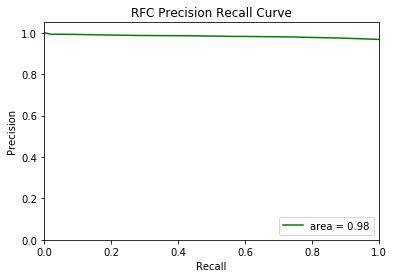

In [227]:
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
try:
    scores_rf = rf.decision_function(X_test)
except:
    scores_rf = rf.predict_proba(X_test)[:,1]

precision_rf, recall_rf, _ = precision_recall_curve(Y_test, scores_rf, pos_label=1)
average_precision_rf = average_precision_score(Y_test, scores_rf)

plt.plot(recall_rf, precision_rf, label='area = %0.2f' % average_precision_rf, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RFC Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [179]:
print (precision_recall_fscore_support(Y_test,Y_pred , average='macro'))

(0.48382690214685697, 0.5, 0.4917805165635078, None)


In [180]:
print (precision_recall_fscore_support(Y_test,Y_pred , average='micro'))

(0.96765380429371395, 0.96765380429371395, 0.96765380429371395, None)


In [181]:
print (precision_recall_fscore_support(Y_test,Y_pred , average='weighted'))

(0.93635388496409711, 0.96765380429371395, 0.95174657546041219, None)


## Logistic Regression

In [228]:
#To select the best parameters
params = {'C':[10,100],'tol':[0.1,0.01]}

# Logistic regression model
log_reg = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial',verbose = 1)

#This will search for best parmeters
clf = GridSearchCV(log_reg,params, refit = "True", n_jobs = -1 , cv = 5)

In [229]:
clf.fit(X_train,Y_train)

print ("best params: " + str(clf.best_params_))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.2s finished
[Parallel(n_jobs=1)]

best params: {'C': 10, 'tol': 0.1}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.4s finished


In [230]:
clf.score(X_test,Y_test)

0.96765380429371395

In [231]:
Y_pred = clf.predict(X_test)

In [187]:
print ('Micro',(precision_recall_fscore_support(Y_test,Y_pred , average='micro')))
print ('Macro',(precision_recall_fscore_support(Y_test,Y_pred , average='macro')))
print ('Weighted',(precision_recall_fscore_support(Y_test,Y_pred , average='weighted')))

('Micro', (0.96765380429371395, 0.96765380429371395, 0.96765380429371395, None))
('Macro', (0.48382690214685697, 0.5, 0.4917805165635078, None))
('Weighted', (0.93635388496409711, 0.96765380429371395, 0.95174657546041219, None))


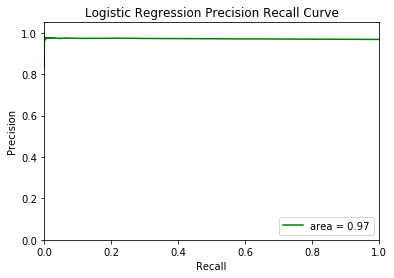

In [232]:
try:
    scores_lr = clf.decision_function(X_test)
except:
    scores_lr = clf.predict_proba(X_test)[:,1]

precision_lr, recall_lr, _ = precision_recall_curve(Y_test, scores_lr, pos_label=1)
average_precision_lr = average_precision_score(Y_test, scores_lr)

plt.plot(recall_lr, precision_lr, label='area = %0.2f' % average_precision_lr, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

## DTC

In [233]:
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train,Y_train)
clf_dtc.score(X_test,Y_test)

0.93679767083357657

In [234]:
Y_pred = clf_dtc.predict(X_test)

In [191]:
print ('Micro',(precision_recall_fscore_support(Y_test,Y_pred , average='micro')))
print ('Macro',(precision_recall_fscore_support(Y_test,Y_pred , average='macro')))
print ('Weighted',(precision_recall_fscore_support(Y_test,Y_pred , average='weighted')))

('Micro', (0.93676162094052451, 0.93676162094052451, 0.93676162094052451, None))
('Macro', (0.55662617825292993, 0.5744365490995329, 0.56388007241162186, None))
('Weighted', (0.94561750441800063, 0.93676162094052451, 0.94105505562307867, None))


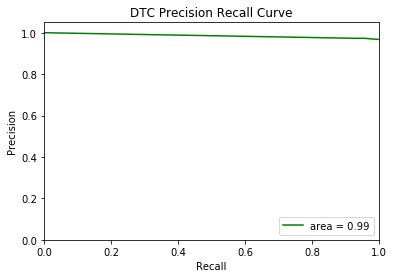

In [235]:
try:
    scores_dtc = clf_dtc.decision_function(X_test)
except:
    scores_dtc = clf_dtc.predict_proba(X_test)[:,1]

precision_dtc, recall_dtc, _ = precision_recall_curve(Y_test, scores_dtc, pos_label=1)
average_precision_dtc = average_precision_score(Y_test, scores_dtc)

plt.plot(recall_dtc, precision_dtc, label='area = %0.2f' % average_precision_dtc, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('DTC Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

In [236]:
clf_nb = GaussianNB()
clf_nb.fit(X_train,Y_train)
clf_nb.score(X_test,Y_test)

0.96765380429371395

In [237]:
Y_pred = clf_nb.predict(X_test)

In [195]:
print ('Micro',(precision_recall_fscore_support(Y_test,Y_pred , average='micro')))
print ('Macro',(precision_recall_fscore_support(Y_test,Y_pred , average='macro')))
print ('Weighted',(precision_recall_fscore_support(Y_test,Y_pred , average='weighted')))

('Micro', (0.96765380429371395, 0.96765380429371395, 0.96765380429371395, None))
('Macro', (0.48382690214685697, 0.5, 0.4917805165635078, None))
('Weighted', (0.93635388496409711, 0.96765380429371395, 0.95174657546041219, None))


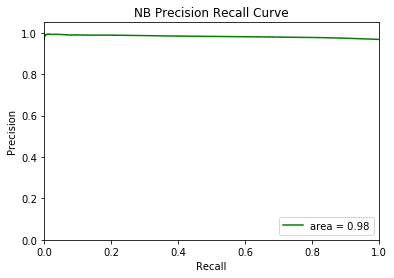

In [238]:
try:
    scores_nb = clf_nb.decision_function(X_test)
except:
    scores_nb = clf_nb.predict_proba(X_test)[:,1]

precision_nb, recall_nb, _ = precision_recall_curve(Y_test, scores_nb, pos_label=1)
average_precision_nb = average_precision_score(Y_test, scores_nb)

plt.plot(recall_nb, precision_nb, label='area = %0.2f' % average_precision_nb, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('NB Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

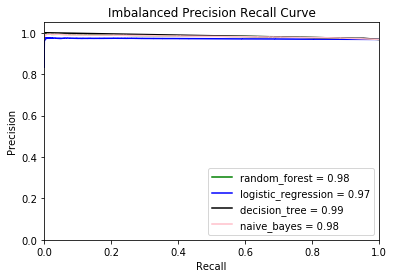

In [239]:
plt.plot(recall_rf, precision_rf, label='random_forest = %0.2f' % average_precision_rf, color="green")
plt.plot(recall_lr, precision_lr, label='logistic_regression = %0.2f' % average_precision_lr, color="blue")
plt.plot(recall_dtc, precision_dtc, label='decision_tree = %0.2f' % average_precision_dtc, color="black")
plt.plot(recall_nb, precision_nb, label='naive_bayes = %0.2f' % average_precision_nb, color="pink")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Imbalanced Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

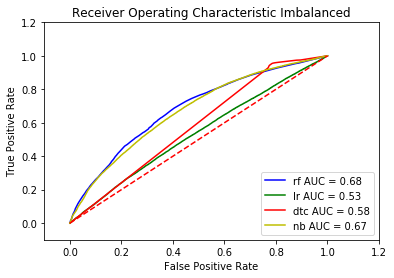

In [240]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds = metrics.roc_curve(Y_test, scores_rf)
roc_auc_rf = auc(fpr_rf,tpr_rf)


fpr_lr, tpr_lr, thresholds = metrics.roc_curve(Y_test, scores_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

fpr_dtc, tpr_dtc, thresholds = metrics.roc_curve(Y_test, scores_dtc)
roc_auc_dtc = auc(fpr_dtc,tpr_dtc)

fpr_nb, tpr_nb, thresholds = metrics.roc_curve(Y_test, scores_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

plt.title('Receiver Operating Characteristic Imbalanced')
plt.plot(fpr_rf,tpr_rf, 'b',label='rf AUC = %0.2f'% roc_auc_rf)
plt.plot(fpr_lr,tpr_lr, 'g',label='lr AUC = %0.2f'% roc_auc_lr)
plt.plot(fpr_dtc,tpr_dtc, 'r',label='dtc AUC = %0.2f'% roc_auc_dtc)
plt.plot(fpr_nb,tpr_nb, 'y',label='nb AUC = %0.2f'% roc_auc_nb)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Approach 2 Undersampling

In [42]:
print ('Certified :',len(certified_df))
print ('Denied :',len(denied_df))


('Certified :', 2818282)
('Denied :', 94348)


In [43]:
Usamp_certified_df = certified_df.sample(frac = 0.033477)
len(Usamp_certified_df)

94348

### Concatenate the undersampled certified dataframe and denied dataframe and then shuffle it

In [44]:
Under_samp_df = pd.concat([Usamp_certified_df,denied_df])
Under_samp_df = Under_samp_df.sample(frac = 1)

In [45]:
Under_samp_label = Under_samp_df.pop(0)

### Encoding the attributes

In [46]:
Under_samp_label_array = Under_samp_label.unique()
ula_le = preprocessing.LabelEncoder()
ula_le.fit(Under_samp_label_array)
Under_samp_label = ula_le.transform(Under_samp_label)

In [47]:
Under_samp_one_array = Under_samp_df[1].unique()
uoa_le = preprocessing.LabelEncoder()
uoa_le.fit(Under_samp_one_array)
Under_samp_df[1] = uoa_le.transform(Under_samp_df[1])

In [48]:
Under_samp_two_array = Under_samp_df[2].unique()
uta_le = preprocessing.LabelEncoder()
uta_le.fit(Under_samp_two_array)
Under_samp_df[2] = uta_le.transform(Under_samp_df[2])

In [49]:
Under_samp_three_array = Under_samp_df[3].unique()
utha_le = preprocessing.LabelEncoder()
utha_le.fit(Under_samp_three_array)
Under_samp_df[3] = utha_le.transform(Under_samp_df[3])

In [50]:
Under_samp_four_array = Under_samp_df[4].unique()
ufa_le = preprocessing.LabelEncoder()
ufa_le.fit(Under_samp_four_array)
Under_samp_df[4] = ufa_le.transform(Under_samp_df[4])

In [51]:
Under_samp_five_array = Under_samp_df[5].unique()
ufia_le = preprocessing.LabelEncoder()
ufia_le.fit(Under_samp_five_array)
Under_samp_df[5] = ufia_le.transform(Under_samp_df[5])

In [52]:
Under_samp_six_array = Under_samp_df[6].unique()
usa_le = preprocessing.LabelEncoder()
usa_le.fit(Under_samp_six_array)
Under_samp_df[6] = usa_le.transform(Under_samp_df[6])

In [53]:
Under_samp_seven_array = Under_samp_df[7].unique()
usea_le = preprocessing.LabelEncoder()
usea_le.fit(Under_samp_seven_array)
Under_samp_df[7] = usea_le.transform(Under_samp_df[7])

### Splitting the undersampled data to test and train sets

In [54]:
X_Under_samp_train, X_Under_samp_test, Y_Under_samp_train,Y_Under_samp_test = train_test_split(Under_samp_df,Under_samp_label,test_size = 0.4,random_state = 0)

## Building a classifier

In [55]:
rf_Under_samp = RandomForestClassifier(n_estimators = 350,min_samples_split = 0.2,min_samples_leaf = 0.2,verbose = 0)
rf_Under_samp.fit(X_Under_samp_train,Y_Under_samp_train)
rf_Under_samp.score(X_Under_samp_test,Y_Under_samp_test)

0.64127770638190751

### Cross validation using Random Forest Classifier

In [56]:
rf_Under_samp_cv = RandomForestClassifier(n_estimators = 350,min_samples_split = 0.2,min_samples_leaf = 0.2,verbose = 0)
scores = cross_val_score(rf_Under_samp_cv, Under_samp_df, Under_samp_label, cv=5)
scores

array([ 0.6400371 ,  0.63963964,  0.64395866,  0.63924956,  0.64441677])

In [57]:
Y_pred = rf_Under_samp.predict(X_Under_samp_test)

In [58]:
print ('Micro',(precision_recall_fscore_support(Y_Under_samp_test,Y_pred , average='micro')))
print ('Macro',(precision_recall_fscore_support(Y_Under_samp_test,Y_pred , average='macro')))
print ('Weighted',(precision_recall_fscore_support(Y_Under_samp_test,Y_pred , average='weighted')))

('Micro', (0.64127770638190751, 0.64127770638190751, 0.64127770638190751, None))
('Macro', (0.64170853755125723, 0.6413561668614518, 0.64108055474908554, None))
('Weighted', (0.64173515745644372, 0.64127770638190751, 0.64105458734917176, None))


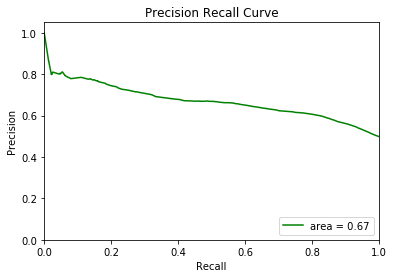

In [90]:
try:
    scores_rf = rf_Under_samp.decision_function(X_Under_samp_test)
except:
    scores_rf = rf_Under_samp.predict_proba(X_Under_samp_test)[:,1]

precision_rf, recall_rf, _ = precision_recall_curve(Y_Under_samp_test, scores_rf, pos_label=1)
average_precision_rf = average_precision_score(Y_Under_samp_test, scores_rf)

plt.plot(recall_rf, precision_rf, label='area = %0.2f' % average_precision_rf, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [60]:
#To select the best parameters
params = {'C':[10,100],'tol':[0.1,0.01]}

# Logistic regression model
log_reg = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial',verbose = 1)

#This will search for best parmeters
clf = GridSearchCV(log_reg,params, refit = "True", n_jobs = -1 , cv = 5)

In [61]:
clf.fit(X_Under_samp_train,Y_Under_samp_train)

print ("best params: " + str(clf.best_params_))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]

best params: {'C': 10, 'tol': 0.1}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


In [62]:
clf.score(X_Under_samp_test,Y_Under_samp_test)

0.56112296135348905

In [63]:
Y_pred = clf.predict(X_Under_samp_test)

In [64]:
print ('Micro',(precision_recall_fscore_support(Y_Under_samp_test,Y_pred , average='micro')))
print ('Macro',(precision_recall_fscore_support(Y_Under_samp_test,Y_pred , average='macro')))
print ('Weighted',(precision_recall_fscore_support(Y_Under_samp_test,Y_pred , average='weighted')))

('Micro', (0.56112296135348905, 0.56112296135348905, 0.56112296135348905, None))
('Macro', (0.56173684550402725, 0.56094913200060237, 0.55963940968539438, None))
('Weighted', (0.56172007507290089, 0.56112296135348905, 0.55971831120072557, None))


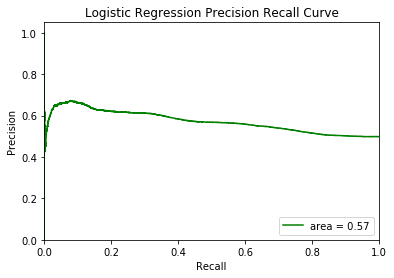

In [91]:
try:
    scores_lr = clf.decision_function(X_Under_samp_test)
except:
    scores_lr = clf.predict_proba(X_Under_samp_test)[:,1]

precision_lr, recall_lr, _ = precision_recall_curve(Y_Under_samp_test, scores_lr, pos_label=1)
average_precision_lr = average_precision_score(Y_Under_samp_test, scores_lr)

plt.plot(recall_lr, precision_lr, label='area = %0.2f' % average_precision_lr, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

## DTC

In [66]:
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_Under_samp_train,Y_Under_samp_train)
clf_dtc.score(X_Under_samp_test,Y_Under_samp_test)

0.64697465520210917

In [67]:
Y_pred = clf_dtc.predict(X_Under_samp_test)

In [68]:
print ('Micro',(precision_recall_fscore_support(Y_Under_samp_test,Y_pred , average='micro')))
print ('Macro',(precision_recall_fscore_support(Y_Under_samp_test,Y_pred , average='macro')))
print ('Weighted',(precision_recall_fscore_support(Y_Under_samp_test,Y_pred , average='weighted')))

('Micro', (0.64697465520210917, 0.64697465520210917, 0.64697465520210917, None))
('Macro', (0.64704668596617076, 0.64693284647095761, 0.64688937375994515, None))
('Weighted', (0.64703874315120313, 0.64697465520210917, 0.64690631372245511, None))


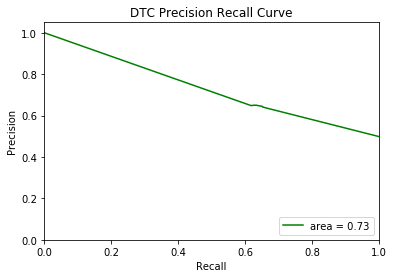

In [92]:
try:
    scores_dtc = clf_dtc.decision_function(X_Under_samp_test)
except:
    scores_dtc = clf_dtc.predict_proba(X_Under_samp_test)[:,1]

precision_dtc, recall_dtc, _ = precision_recall_curve(Y_Under_samp_test, scores_dtc, pos_label=1)
average_precision_dtc = average_precision_score(Y_Under_samp_test, scores_dtc)

plt.plot(recall_dtc, precision_dtc, label='area = %0.2f' % average_precision_dtc, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('DTC Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

In [70]:
clf_nb = GaussianNB()
clf_nb.fit(X_Under_samp_train,Y_Under_samp_train)
clf_nb.score(X_Under_samp_test,Y_Under_samp_test)

0.64233760383682881

In [71]:
Y_pred = clf_nb.predict(X_Under_samp_test)

In [72]:
print ('Micro',(precision_recall_fscore_support(Y_Under_samp_test,Y_pred , average='micro')))
print ('Macro',(precision_recall_fscore_support(Y_Under_samp_test,Y_pred , average='macro')))
print ('Weighted',(precision_recall_fscore_support(Y_Under_samp_test,Y_pred , average='weighted')))

('Micro', (0.64233760383682881, 0.64233760383682881, 0.64233760383682881, None))
('Macro', (0.64236917519817904, 0.64235505379773339, 0.64233278672871386, None))
('Weighted', (0.64237852224671099, 0.64233760383682881, 0.64232873479300701, None))


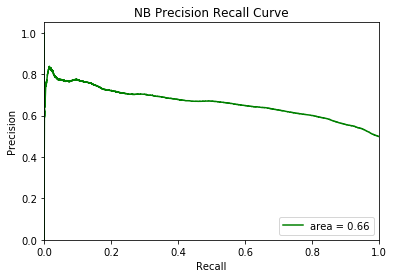

In [93]:
try:
    scores_nb = clf_nb.decision_function(X_Under_samp_test)
except:
    scores_nb = clf_nb.predict_proba(X_Under_samp_test)[:,1]

precision_nb, recall_nb, _ = precision_recall_curve(Y_Under_samp_test, scores_nb, pos_label=1)
average_precision_nb = average_precision_score(Y_Under_samp_test, scores_nb)

plt.plot(recall_nb, precision_nb, label='area = %0.2f' % average_precision_nb, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('NB Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

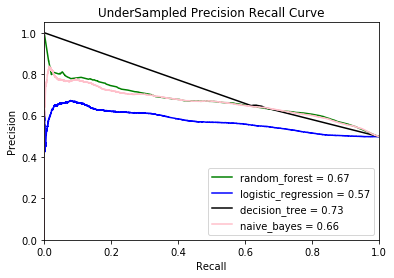

In [94]:
plt.plot(recall_rf, precision_rf, label='random_forest = %0.2f' % average_precision_rf, color="green")
plt.plot(recall_lr, precision_lr, label='logistic_regression = %0.2f' % average_precision_lr, color="blue")
plt.plot(recall_dtc, precision_dtc, label='decision_tree = %0.2f' % average_precision_dtc, color="black")
plt.plot(recall_nb, precision_nb, label='naive_bayes = %0.2f' % average_precision_nb, color="pink")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('UnderSampled Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

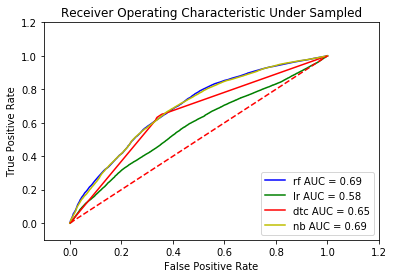

In [95]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds = metrics.roc_curve(Y_Under_samp_test, scores_rf)
roc_auc_rf = auc(fpr_rf,tpr_rf)


fpr_lr, tpr_lr, thresholds = metrics.roc_curve(Y_Under_samp_test, scores_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

fpr_dtc, tpr_dtc, thresholds = metrics.roc_curve(Y_Under_samp_test, scores_dtc)
roc_auc_dtc = auc(fpr_dtc,tpr_dtc)

fpr_nb, tpr_nb, thresholds = metrics.roc_curve(Y_Under_samp_test, scores_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

plt.title('Receiver Operating Characteristic Under Sampled')
plt.plot(fpr_rf,tpr_rf, 'b',label='rf AUC = %0.2f'% roc_auc_rf)
plt.plot(fpr_lr,tpr_lr, 'g',label='lr AUC = %0.2f'% roc_auc_lr)
plt.plot(fpr_dtc,tpr_dtc, 'r',label='dtc AUC = %0.2f'% roc_auc_dtc)
plt.plot(fpr_nb,tpr_nb, 'y',label='nb AUC = %0.2f'% roc_auc_nb)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [85]:
tpr

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

# Approach 3 Oversampling

In [241]:
print ('Certified: ',len(certified_df))
print ('Denied: ',len(denied_df))

('Certified: ', 2818282)
('Denied: ', 94348)


In [242]:
Dec_certified = certified_df.sample(frac = 0.0669542650452) #188696
len(Dec_certified)

188696

## Concatenate the decreased certified samples and the denied samples

In [243]:
Over_samp_df = pd.concat([Dec_certified,denied_df])
Over_samp_df = Over_samp_df.sample(frac = 1)

In [244]:
Over_samp_label = Over_samp_df.pop(0)

In [245]:
Over_samp_label_array = Over_samp_label.unique()
ula_le = preprocessing.LabelEncoder()
ula_le.fit(Over_samp_label_array)
Over_samp_label = ula_le.transform(Over_samp_label)

In [246]:
Over_samp_one_array = Over_samp_df[1].unique()
uoa_le = preprocessing.LabelEncoder()
uoa_le.fit(Over_samp_one_array)
Over_samp_df[1] = uoa_le.transform(Over_samp_df[1])

In [247]:
Over_samp_two_array = Over_samp_df[2].unique()
uta_le = preprocessing.LabelEncoder()
uta_le.fit(Over_samp_two_array)
Over_samp_df[2] = uta_le.transform(Over_samp_df[2])

In [248]:
Over_samp_three_array = Over_samp_df[3].unique()
utha_le = preprocessing.LabelEncoder()
utha_le.fit(Over_samp_three_array)
Over_samp_df[3] = utha_le.transform(Over_samp_df[3])

In [249]:
Over_samp_four_array = Over_samp_df[4].unique()
ufa_le = preprocessing.LabelEncoder()
ufa_le.fit(Over_samp_four_array)
Over_samp_df[4] = ufa_le.transform(Over_samp_df[4])

In [250]:
Over_samp_five_array = Over_samp_df[5].unique()
ufia_le = preprocessing.LabelEncoder()
ufia_le.fit(Over_samp_five_array)
Over_samp_df[5] = ufia_le.transform(Over_samp_df[5])

In [251]:
Over_samp_six_array = Over_samp_df[6].unique()
usa_le = preprocessing.LabelEncoder()
usa_le.fit(Over_samp_six_array)
Over_samp_df[6] = usa_le.transform(Over_samp_df[6])

In [252]:
Over_samp_seven_array = Over_samp_df[7].unique()
usea_le = preprocessing.LabelEncoder()
usea_le.fit(Over_samp_seven_array)
Over_samp_df[7] = usea_le.transform(Over_samp_df[7])

In [253]:
X_Over_samp_train, X_Over_samp_test, Y_Over_samp_train,Y_Over_samp_test = train_test_split(Over_samp_df,Over_samp_label,test_size = 0.4,random_state = 0)

### Now concatenate the train label to train set so that we can over sample the data

In [254]:
X_Over_samp_train[0] = Y_Over_samp_train

/home/harvee/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [255]:
X_Over_samp_train_array = np.array(X_Over_samp_train)

In [258]:
X_certified_samp_over = [i for i in X_Over_samp_train_array if i[7] == 1]
X_denied_samp_over = [i for i in X_Over_samp_train_array if i[7] == 0]


In [259]:
print 'Denied',len(X_denied_samp_over)
print 'Certified',len(X_certified_samp_over)

Denied 56756
Certified 113070


In [272]:
X_certified_samp_over_df = pd.DataFrame(X_certified_samp_over)
X_denied_samp_over_df = pd.DataFrame(X_denied_samp_over)


## Oversampling the denied set

In [273]:
X_denied_samp_over_df = pd.concat([X_denied_samp_over_df,X_denied_samp_over_df.sample(frac = 0.991)])
print ('Denied',len(X_denied_samp_over_df))
print ('Certified',len(X_certified_samp_over_df))

('Denied', 113001)
('Certified', 113070)


## Combine denied and certified and then shuffle before training

In [274]:
X_Over_samp_train = pd.concat([X_denied_samp_over_df,X_certified_samp_over_df])
X_Over_samp_train = X_Over_samp_train.sample(frac = 1)

In [275]:
Y_Over_samp_train = np.array(X_Over_samp_train.pop(7))
X_Over_samp_train.columns = X_Over_samp_test.columns

In [276]:
rf = RandomForestClassifier(n_estimators = 350,min_samples_split = 0.2,min_samples_leaf = 0.2,verbose = 0)
rf.fit(X_Over_samp_train,Y_Over_samp_train)
rf.score(X_Over_samp_test,Y_Over_samp_test)

0.67400943312900774

In [297]:
rf_Over_samp_cv = RandomForestClassifier(n_estimators = 350,min_samples_split = 0.2,min_samples_leaf = 0.2,verbose = 0)
scores = cross_val_score(rf_Over_samp_cv, X_Over_samp_train, Y_Over_samp_train, cv=5)
scores

array([ 0.63945593,  0.6410625 ,  0.63896138,  0.64411465,  0.64024417])

In [277]:
Y_pred = rf.predict(X_Over_samp_test)

In [278]:
print ('Micro',(precision_recall_fscore_support(Y_Over_samp_test,Y_pred , average='micro')))
print ('Macro',(precision_recall_fscore_support(Y_Over_samp_test,Y_pred , average='macro')))
print ('Weighted',(precision_recall_fscore_support(Y_Over_samp_test,Y_pred , average='weighted')))

('Micro', (0.67400943312900774, 0.67400943312900774, 0.67400943312900774, None))
('Macro', (0.63703965763681114, 0.64169807758846775, 0.63891578409626093, None))
('Weighted', (0.68022745913168825, 0.67400943312900774, 0.67673173625263816, None))


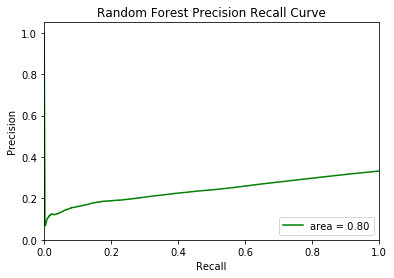

In [279]:
try:
    scores_rf = rf.decision_function(X_Over_samp_test)
except:
    scores_rf = rf.predict_proba(X_Over_samp_test)[:,1]

precision_rf, recall_rf, _ = precision_recall_curve(Y_Over_samp_test, scores_rf, pos_label=0)
average_precision_rf = average_precision_score(Y_Over_samp_test, scores_rf)

plt.plot(recall_rf, precision_rf, label='area = %0.2f' % average_precision_rf, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

## Logistic regression

In [280]:
#To select the best parameters
params = {'C':[10,100],'tol':[0.1,0.01]}

# Logistic regression model
log_reg = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial',verbose = 1)

#This will search for best parmeters
clf = GridSearchCV(log_reg,params, refit = "True", n_jobs = -1 , cv = 5)

In [281]:
clf.fit(X_Over_samp_train,Y_Over_samp_train)

print ("best params: " + str(clf.best_params_))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]

best params: {'C': 10, 'tol': 0.1}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


In [282]:
clf.score(X_Over_samp_test,Y_Over_samp_test)

0.54211344485859136

In [283]:
Y_pred = clf.predict(X_Over_samp_test)

In [284]:
print ('Micro',(precision_recall_fscore_support(Y_Over_samp_test,Y_pred , average='micro')))
print ('Macro',(precision_recall_fscore_support(Y_Over_samp_test,Y_pred , average='macro')))
print ('Weighted',(precision_recall_fscore_support(Y_Over_samp_test,Y_pred , average='weighted')))

('Micro', (0.54211344485859136, 0.54211344485859136, 0.54211344485859136, None))
('Macro', (0.55537877234445876, 0.56205314768856118, 0.5343087249964924, None))
('Weighted', (0.61323811472949052, 0.54211344485859136, 0.55456148580941977, None))


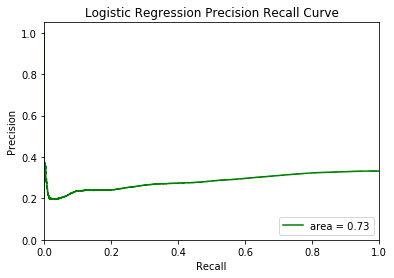

In [285]:
try:
    scores_lr = clf.decision_function(X_Over_samp_test)
except:
    scores_lr = clf.predict_proba(X_Over_samp_test)[:,1]

precision_lr, recall_lr, _ = precision_recall_curve(Y_Over_samp_test, scores_lr, pos_label=0)
average_precision_lr = average_precision_score(Y_Over_samp_test, scores_lr)

plt.plot(recall_lr, precision_lr, label='area = %0.2f' % average_precision_lr, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

## Apply DTC

In [286]:
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_Over_samp_train,Y_Over_samp_train)
clf_dtc.score(X_Over_samp_test,Y_Over_samp_test)

0.68421099118514728

In [287]:
Y_pred = clf_dtc.predict(X_Over_samp_test)

In [288]:
print ('Micro',(precision_recall_fscore_support(Y_Over_samp_test,Y_pred , average='micro')))
print ('Macro',(precision_recall_fscore_support(Y_Over_samp_test,Y_pred , average='macro')))
print ('Weighted',(precision_recall_fscore_support(Y_Over_samp_test,Y_pred , average='weighted')))

('Micro', (0.68421099118514728, 0.68421099118514728, 0.68421099118514728, None))
('Macro', (0.64692380439541042, 0.65055846740948686, 0.64850495242844419, None))
('Weighted', (0.68846882614256444, 0.68421099118514728, 0.68613952297222824, None))


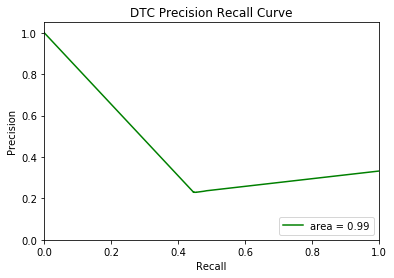

In [289]:
try:
    scores_dtc = clf_dtc.decision_function(X_Over_samp_test)
except:
    scores_dtc = clf_dtc.predict_proba(X_Over_samp_test)[:,1]

precision_dtc, recall_dtc, _ = precision_recall_curve(Y_Over_samp_test, scores_dtc, pos_label=0)
average_precision = average_precision_score(Y_Over_samp_test, scores_dtc)

plt.plot(recall_dtc, precision_dtc, label='area = %0.2f' % average_precision_dtc, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('DTC Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

In [290]:
clf_nb = GaussianNB()
clf_nb.fit(X_Over_samp_train,Y_Over_samp_train)
clf_nb.score(X_Over_samp_test,Y_Over_samp_test)

0.64117013195781591

In [291]:
Y_pred = clf_nb.predict(X_Over_samp_test)

In [292]:
print ('Micro',(precision_recall_fscore_support(Y_Over_samp_test,Y_pred , average='micro')))
print ('Macro',(precision_recall_fscore_support(Y_Over_samp_test,Y_pred , average='macro')))
print ('Weighted',(precision_recall_fscore_support(Y_Over_samp_test,Y_pred , average='weighted')))

('Micro', (0.64117013195781591, 0.64117013195781591, 0.64117013195781591, None))
('Macro', (0.62563447198040345, 0.64020108078594928, 0.62327464950767419, None))
('Weighted', (0.67784186653605871, 0.64117013195781591, 0.65085759567028934, None))


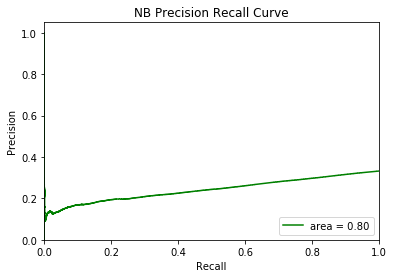

In [293]:
try:
    scores_nb = clf_nb.decision_function(X_Over_samp_test)
except:
    scores_nb = clf_nb.predict_proba(X_Over_samp_test)[:,1]

precision_nb, recall_nb, _ = precision_recall_curve(Y_Over_samp_test, scores_nb, pos_label=0)
average_precision_nb = average_precision_score(Y_Over_samp_test, scores_nb)

plt.plot(recall_nb, precision_nb, label='area = %0.2f' % average_precision_nb, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('NB Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

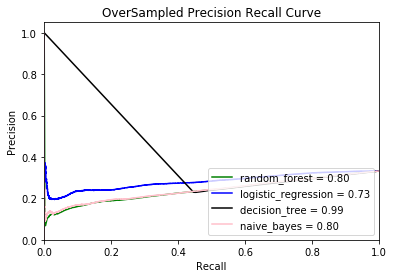

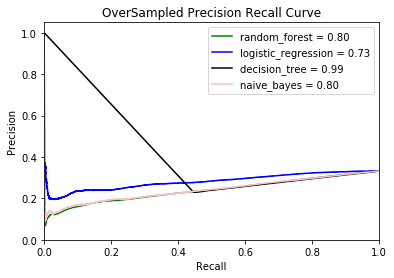

In [295]:
plt.plot(recall_rf, precision_rf, label='random_forest = %0.2f' % average_precision_rf, color="green")
plt.plot(recall_lr, precision_lr, label='logistic_regression = %0.2f' % average_precision_lr, color="blue")
plt.plot(recall_dtc, precision_dtc, label='decision_tree = %0.2f' % average_precision_dtc, color="black")
plt.plot(recall_nb, precision_nb, label='naive_bayes = %0.2f' % average_precision_nb, color="pink")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('OverSampled Precision Recall Curve')
plt.legend(loc="upper right")
plt.show()

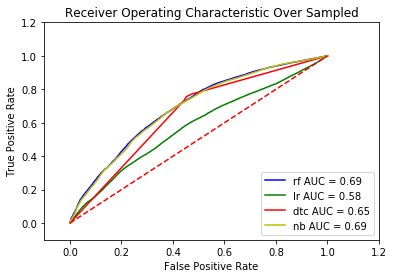

In [296]:
fpr_rf, tpr_rf, thresholds = metrics.roc_curve(Y_Over_samp_test, scores_rf)
roc_auc_rf = auc(fpr_rf,tpr_rf)


fpr_lr, tpr_lr, thresholds = metrics.roc_curve(Y_Over_samp_test, scores_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

fpr_dtc, tpr_dtc, thresholds = metrics.roc_curve(Y_Over_samp_test, scores_dtc)
roc_auc_dtc = auc(fpr_dtc,tpr_dtc)

fpr_nb, tpr_nb, thresholds = metrics.roc_curve(Y_Over_samp_test, scores_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

plt.title('Receiver Operating Characteristic Over Sampled')
plt.plot(fpr_rf,tpr_rf, 'b',label='rf AUC = %0.2f'% roc_auc_rf)
plt.plot(fpr_lr,tpr_lr, 'g',label='lr AUC = %0.2f'% roc_auc_lr)
plt.plot(fpr_dtc,tpr_dtc, 'r',label='dtc AUC = %0.2f'% roc_auc_dtc)
plt.plot(fpr_nb,tpr_nb, 'y',label='nb AUC = %0.2f'% roc_auc_nb)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#  Approach Oversampling 2

## Oversampling before splitting the data

In [140]:
print (len(Dec_certified))
print (len(denied_df))

188696
94348


In [141]:
Inc_denied = pd.concat([denied_df,denied_df])
Inc_denied = Inc_denied.sample(frac = 1)

In [142]:
Over_before_df = pd.concat([Dec_certified,Inc_denied])
Over_before_df = Over_before_df.sample(frac = 1)

In [143]:
len(Over_before_df)

377392

In [144]:
Over_before_label_df = Over_before_df.pop(0)

In [145]:
Over_before_label_array = Over_before_label_df.unique()
ula_le = preprocessing.LabelEncoder()
ula_le.fit(Over_before_label_array)
Over_before_label_df = ula_le.transform(Over_before_label_df)

In [146]:
Over_before_one_array = Over_before_df[1].unique()
uoa_le = preprocessing.LabelEncoder()
uoa_le.fit(Over_before_one_array)
Over_before_df[1] = uoa_le.transform(Over_before_df[1])

In [147]:
Over_before_two_array = Over_before_df[2].unique()
uta_le = preprocessing.LabelEncoder()
uta_le.fit(Over_before_two_array)
Over_before_df[2] = uta_le.transform(Over_before_df[2])

In [148]:
Over_before_three_array = Over_before_df[3].unique()
utha_le = preprocessing.LabelEncoder()
utha_le.fit(Over_before_three_array)
Over_before_df[3] = utha_le.transform(Over_before_df[3])

In [149]:
Over_before_four_array = Over_before_df[4].unique()
ufa_le = preprocessing.LabelEncoder()
ufa_le.fit(Over_before_four_array)
Over_before_df[4] = ufa_le.transform(Over_before_df[4])

In [150]:
Over_before_five_array = Over_before_df[5].unique()
ufia_le = preprocessing.LabelEncoder()
ufia_le.fit(Over_before_five_array)
Over_before_df[5] = ufia_le.transform(Over_before_df[5])

In [151]:
Over_before_six_array = Over_before_df[6].unique()
usa_le = preprocessing.LabelEncoder()
usa_le.fit(Over_before_six_array)
Over_before_df[6] = usa_le.transform(Over_before_df[6])

In [152]:
Over_before_seven_array = Over_before_df[7].unique()
usea_le = preprocessing.LabelEncoder()
usea_le.fit(Over_before_seven_array)
Over_before_df[7] = usea_le.transform(Over_before_df[7])

In [153]:
len(Over_before_df)

377392

In [154]:
Over_before_label_df

array([1, 0, 0, ..., 1, 1, 0])

In [155]:
X_Over_before_train, X_Over_before_test, Y_Over_before_train,Y_Over_before_test = train_test_split(Over_before_df,Over_before_label_df,test_size = 0.4,random_state = 0)

In [156]:
rf_over_before = RandomForestClassifier(n_estimators = 350,min_samples_split = 0.2,min_samples_leaf = 0.2,verbose = 0)
rf_over_before.fit(X_Over_before_train,Y_Over_before_train)
rf_over_before.score(X_Over_before_test,Y_Over_before_test)

0.63896341342236529

In [157]:
Y_pred = rf_over_before.predict(X_Over_before_test)

In [158]:
print ('Micro',(precision_recall_fscore_support(Y_Over_before_test,Y_pred , average='micro')))
print ('Macro',(precision_recall_fscore_support(Y_Over_before_test,Y_pred , average='macro')))
print ('Weighted',(precision_recall_fscore_support(Y_Over_before_test,Y_pred , average='weighted')))

('Micro', (0.63896341342236529, 0.63896341342236529, 0.63896341342236529, None))
('Macro', (0.64108933847964877, 0.63892779180612091, 0.63756225252264775, None))
('Weighted', (0.64107943987221039, 0.63896341342236529, 0.6375752400570901, None))


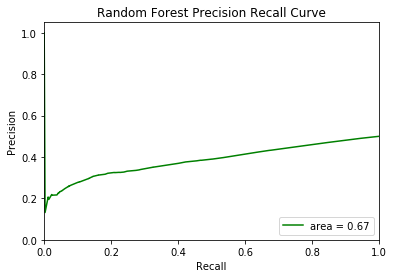

In [159]:
try:
    scores_rf = rf_over_before.decision_function(X_Over_before_test)
except:
    scores_rf = rf_over_before.predict_proba(X_Over_before_test)[:,1]

precision_rf, recall_rf, _ = precision_recall_curve(Y_Over_before_test, scores_rf, pos_label=0)
average_precision_rf = average_precision_score(Y_Over_before_test, scores_rf)

plt.plot(recall_rf, precision_rf, label='area = %0.2f' % average_precision_rf, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [160]:
#To select the best parameters
params = {'C':[10,100],'tol':[0.1,0.01]}

# Logistic regression model
log_reg = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial',verbose = 1)

#This will search for best parmeters
clf = GridSearchCV(log_reg,params, refit = "True", n_jobs = -1 , cv = 5)

In [161]:
clf.fit(X_Over_before_train,Y_Over_before_train)

print ("best params: " + str(clf.best_params_))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]

best params: {'C': 10, 'tol': 0.1}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished


In [162]:
clf.score(X_Over_before_test,Y_Over_before_test)

0.56228594897884832

In [163]:
Y_pred = clf.predict(X_Over_before_test)

In [164]:
print ('Micro',(precision_recall_fscore_support(Y_Over_before_test,Y_pred , average='micro')))
print ('Macro',(precision_recall_fscore_support(Y_Over_before_test,Y_pred , average='macro')))
print ('Weighted',(precision_recall_fscore_support(Y_Over_before_test,Y_pred , average='weighted')))

('Micro', (0.56228594897884832, 0.56228594897884832, 0.56228594897884832, None))
('Macro', (0.56315917773439605, 0.5623192016849663, 0.56084033610088924, None))
('Weighted', (0.56316354162099103, 0.56228594897884832, 0.56082581487696803, None))


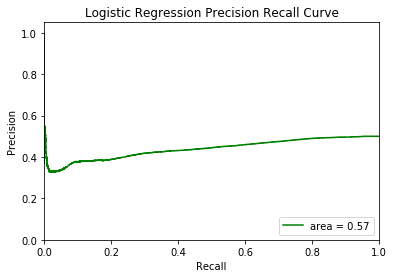

In [165]:
try:
    scores_lr = clf.decision_function(X_Over_before_test)
except:
    scores_lr = clf.predict_proba(X_Over_before_test)[:,1]

precision_lr, recall_lr, _ = precision_recall_curve(Y_Over_before_test, scores_lr, pos_label=0)
average_precision_lr = average_precision_score(Y_Over_before_test, scores_lr)

plt.plot(recall_lr, precision_lr, label='area = %0.2f' % average_precision_lr, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

##  Decision Tree Classifier


In [166]:
clf_dtc = DecisionTreeClassifier(random_state = 0)
clf_dtc.fit(X_Over_before_train,Y_Over_before_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [167]:
clf_dtc.score(X_Over_before_test,Y_Over_before_test)

0.77059692495213872

In [168]:
Y_pred = clf_dtc.predict(X_Over_before_test)

In [169]:
print ('Micro',(precision_recall_fscore_support(Y_Over_before_test,Y_pred , average='micro')))
print ('Macro',(precision_recall_fscore_support(Y_Over_before_test,Y_pred , average='macro')))
print ('Weighted',(precision_recall_fscore_support(Y_Over_before_test,Y_pred , average='weighted')))

('Micro', (0.77059692495213872, 0.77059692495213872, 0.77059692495213861, None))
('Macro', (0.77588091851743524, 0.77063674473967669, 0.76951071136486993, None))
('Weighted', (0.77590300603197815, 0.77059692495213872, 0.76950159232770954, None))


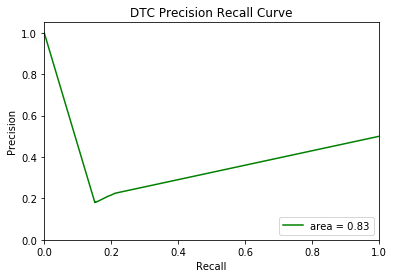

In [170]:
try:
    scores_dtc = clf_dtc.decision_function(X_Over_before_test)
except:
    scores_dtc = clf_dtc.predict_proba(X_Over_before_test)[:,1]

precision_dtc, recall_dtc, _ = precision_recall_curve(Y_Over_before_test, scores_dtc, pos_label=0)
average_precision_dtc = average_precision_score(Y_Over_before_test, scores_dtc)

plt.plot(recall_dtc, precision_dtc, label='area = %0.2f' % average_precision_dtc, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('DTC Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

In [91]:
clf_nb = GaussianNB()
clf_nb.fit(X_Over_before_train,Y_Over_before_train)
clf_nb.score(X_Over_before_test,Y_Over_before_test)

0.64277906953635799

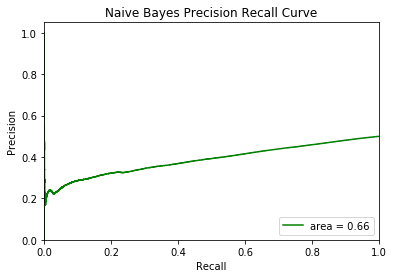

In [171]:
try:
    scores_nb = clf_nb.decision_function(X_Over_before_test)
except:
    scores_nb = clf_nb.predict_proba(X_Over_before_test)[:,1]

precision_nb, recall_nb, _ = precision_recall_curve(Y_Over_before_test, scores_nb, pos_label=0)
average_precision_nb = average_precision_score(Y_Over_before_test, scores_nb)

plt.plot(recall_nb, precision_nb, label='area = %0.2f' % average_precision_nb, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Naive Bayes Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

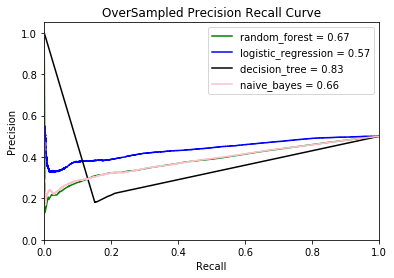

In [172]:
plt.plot(recall_rf, precision_rf, label='random_forest = %0.2f' % average_precision_rf, color="green")
plt.plot(recall_lr, precision_lr, label='logistic_regression = %0.2f' % average_precision_lr, color="blue")
plt.plot(recall_dtc, precision_dtc, label='decision_tree = %0.2f' % average_precision_dtc, color="black")
plt.plot(recall_nb, precision_nb, label='naive_bayes = %0.2f' % average_precision_nb, color="pink")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('OverSampled Precision Recall Curve')
plt.legend(loc="upper right")
plt.show()

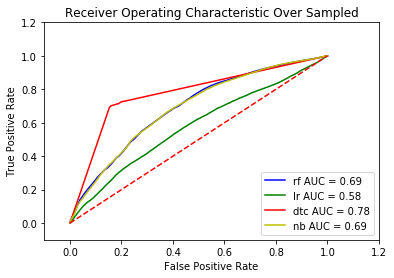

In [173]:
fpr_rf, tpr_rf, thresholds = metrics.roc_curve(Y_Over_before_test, scores_rf)
roc_auc_rf = auc(fpr_rf,tpr_rf)


fpr_lr, tpr_lr, thresholds = metrics.roc_curve(Y_Over_before_test, scores_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

fpr_dtc, tpr_dtc, thresholds = metrics.roc_curve(Y_Over_before_test, scores_dtc)
roc_auc_dtc = auc(fpr_dtc,tpr_dtc)

fpr_nb, tpr_nb, thresholds = metrics.roc_curve(Y_Over_before_test, scores_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

plt.title('Receiver Operating Characteristic Over Sampled')
plt.plot(fpr_rf,tpr_rf, 'b',label='rf AUC = %0.2f'% roc_auc_rf)
plt.plot(fpr_lr,tpr_lr, 'g',label='lr AUC = %0.2f'% roc_auc_lr)
plt.plot(fpr_dtc,tpr_dtc, 'r',label='dtc AUC = %0.2f'% roc_auc_dtc)
plt.plot(fpr_nb,tpr_nb, 'y',label='nb AUC = %0.2f'% roc_auc_nb)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [224]:
len(file1_h1b)

3002458